In [12]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt 
import geopandas as gpd
# set default
pio.templates.default = "plotly_dark"

In [2]:
# read data
df = pd.read_csv('All_States_GE.csv')
df

ed_map = {
    "Others": 0,
    "Illiterate": 1,
    "Literate": 2,
    "5th Pass": 3,
    "8th Pass": 4,
    "10th Pass": 5,
    "12th Pass": 6,
    "Graduate": 7,
    "Graduate Professional": 8,
    "Post Graduate": 9,
    "Doctorate": 10
}

C:\Users\Rahul\AppData\Local\Temp\ipykernel_19352\2377711653.py:2: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('All_States_GE.csv')


In [3]:
fdf = df.dropna(subset=["Candidate", "Votes"])
fdf

,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,S.P.N.S.GAWDA,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,N.DEO,M,...,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,R.S.NIM,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,R.SINGH,NaN,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)


In [4]:
# avg of votes for women and men sectioned by Election Number
elNumNotaDict = {}
for i in range(len(fdf)):
    elNum = fdf.iloc[i]["Assembly_No"]
    if elNum not in elNumNotaDict:
        elNumNotaDict[elNum] = [0, 0]

    if fdf.iloc[i]["Candidate"].upper() == "NOTA" or fdf.iloc[i]["Candidate"].upper() == "NONE OF THE ABOVE":
        elNumNotaDict[elNum][0] += fdf.iloc[i]["Votes"]
    elNumNotaDict[elNum][1] += fdf.iloc[i]["Votes"]


In [5]:
avgDict = {}
for elNum in elNumNotaDict:
    avgDict[elNum] = 100 * elNumNotaDict[elNum][0] / max(1, elNumNotaDict[elNum][1])
    
avgDict

keys = list(avgDict.keys())
line = [point for point in avgDict.values()]


fig = go.Figure()

fig.add_trace(go.Scatter(x=keys, y=line, mode='lines', name='Nota'))


fig.update_layout(title='Nota vote %',
                  xaxis_title='X Axis',
                  yaxis_title='Values',
                  hovermode='x')

fig.show()


In [6]:
stateDict = {} # State -> Assembly Number
for i in range(len(fdf)):
    state = fdf.iloc[i]["State_Name"]
    if state not in stateDict:
        stateDict[state] = {}
    elNum = fdf.iloc[i]["Assembly_No"]
    if elNum not in stateDict[state]:
        stateDict[state][elNum] = [0, 0]

    if fdf.iloc[i]["Candidate"].upper() == "NOTA" or fdf.iloc[i]["Candidate"].upper() == "NONE OF THE ABOVE":
        stateDict[state][elNum][0] += fdf.iloc[i]["Votes"]
    stateDict[state][elNum][1] += fdf.iloc[i]["Votes"]


stateDict

{'Andaman_&_Nicobar_Islands': {17: [1412.0, 207296.0],
  16: [1564.0, 190328.0],
  15: [0, 170103.0],
  14: [0, 153825.0],
  13: [0, 145791.0],
  12: [0, 145836.0],
  11: [0, 128212.0],
  10: [0, 107316.0],
  9: [0, 113065.0],
  8: [0, 88968.0],
  7: [0, 78899.0],
  6: [0, 60568.0],
  5: [0, 44525.0],
  4: [0, 36732.0]},
 'Andhra_Pradesh': {17: [484390.0, 32717361.0],
  16: [340554.0, 50429068.0],
  15: [0, 44059162.0],
  14: [0, 40380068.0],
  13: [0, 33741941.0],
  12: [0, 31898911.0],
  11: [0, 31175441.0],
  10: [0, 26756687.0],
  9: [0, 28764919.0],
  8: [0, 22963757.0],
  7: [0, 16907792.0],
  6: [0, 18297514.0],
  5: [0, 13073383.0],
  4: [0, 13868473.0],
  3: [0, 12153329.0]},
 'Arunachal_Pradesh': {17: [7464.0, 652091.0],
  16: [6321.0, 596956.0],
  15: [0, 500642.0],
  14: [0, 384928.0],
  13: [0, 425663.0],
  12: [0, 328764.0],
  11: [0, 293448.0],
  10: [0, 260901.0],
  9: [0, 273130.0],
  8: [0, 226546.0],
  7: [0, 173579.0],
  6: [0, 50690.0]},
 'Assam': {17: [178353.0, 1

In [10]:
outputDir = "./output/notaAnalysis/" 
stateAvgDict = {}
for state in stateDict:
    stateAvgDict[state] = {}
    for elNum in stateDict[state]:
        stateAvgDict[state][elNum] = 100 * stateDict[state][elNum][0] / (1 if stateDict[state][elNum][1] == 0 else stateDict[state][elNum][1])
                                  
        
stateAvgDict

{'Andaman_&_Nicobar_Islands': {17: 0.6811515899969126,
  16: 0.8217393131856584,
  15: 0.0,
  14: 0.0,
  13: 0.0,
  12: 0.0,
  11: 0.0,
  10: 0.0,
  9: 0.0,
  8: 0.0,
  7: 0.0,
  6: 0.0,
  5: 0.0,
  4: 0.0},
 'Andhra_Pradesh': {17: 1.4805289460846185,
  16: 0.6753128969188961,
  15: 0.0,
  14: 0.0,
  13: 0.0,
  12: 0.0,
  11: 0.0,
  10: 0.0,
  9: 0.0,
  8: 0.0,
  7: 0.0,
  6: 0.0,
  5: 0.0,
  4: 0.0,
  3: 0.0},
 'Arunachal_Pradesh': {17: 1.1446255200577833,
  16: 1.058872010667453,
  15: 0.0,
  14: 0.0,
  13: 0.0,
  12: 0.0,
  11: 0.0,
  10: 0.0,
  9: 0.0,
  8: 0.0,
  7: 0.0,
  6: 0.0},
 'Assam': {17: 0.9916176222193336,
  16: 0.9693024241755521,
  15: 0.0,
  14: 0.0,
  13: 0.0,
  12: 0.0,
  11: 0.0,
  10: 0.0,
  8: 0.0,
  7: 0.0,
  6: 0.0,
  5: 0.0,
  4: 0.0,
  3: 0.0},
 'Bihar': {17: 2.071576443218455,
  16: 1.6211978887329848,
  15: 0.0,
  14: 0.0,
  13: 0.0,
  12: 0.0,
  11: 0.0,
  10: 0.0,
  9: 0.0,
  8: 0.0,
  7: 0.0,
  6: 0.0,
  5: 0.0,
  4: 0.0,
  3: 0.0},
 'Chandigarh': {17: 0

In [53]:

mxNum = 0
for state in stateAvgDict:
    for elNum in stateAvgDict[state]:
        mxNum = max(mxNum, stateAvgDict[state][elNum])

mxNum = np.ceil(mxNum) 

for elNum in range(1, 18):
    with open(outputDir + str(elNum) + ".txt", "w") as f:
        text = ""
        for state in stateAvgDict:
            if elNum in stateAvgDict[state]:
                text += f"INDIA\t{state.upper().replace('_', ' ').replace('ANDAMAN & NICOBAR', 'A & N')}\t{stateAvgDict[state][elNum]}\n"

        text += f"INDIA\tUPPER\t{mxNum}\nINDIA\tLOWER\t0\n"
        f.write(text)

        


In [8]:
map1_to_2 = {
    "Andaman & Nicobar": "Andaman_&_Nicobar_Islands",
    "Daman and Diu and Dadra and Nagar Haveli": "Dadra & Nagar Haveli And Daman & Diu",
    "Madhya Pradesh": "Madhya_Pradesh",
    "Tamilnadu": "Tamil_Nadu",
    "Chhattishgarh": "Chhattisgarh",
    "Telengana": "Telangana",
    "Andhra Pradesh": "Andhra_Pradesh",
    "Himachal Pradesh": "Himachal_Pradesh",
    "Uttar Pradesh": "Uttar_Pradesh",
    "Arunachal Pradesh": "Arunachal_Pradesh",
    "West Bengal": "West_Bengal",
    "Jammu and Kashmir": "Jammu_&_Kashmir",
    "Ladakh": "Jammu_&_Kashmir"
}

map2_to_1 = {
    "Andaman_&_Nicobar_Islands": "Andaman & Nicobar",
    "Dadra & Nagar Haveli And Daman & Diu": "Daman and Diu and Dadra and Nagar Haveli",
    "Madhya_Pradesh": "Madhya Pradesh",
    "Tamil_Nadu": "Tamilnadu",
    "Chhattisgarh": "Chhattishgarh",
    "Telangana": "Telengana",
    "Andhra_Pradesh": "Andhra Pradesh",
    "Himachal_Pradesh": "Himachal Pradesh",
    "Uttar_Pradesh": "Uttar Pradesh",
    "Arunachal_Pradesh": "Arunachal Pradesh",
    "West_Bengal": "West Bengal",
    "Jammu_&_Kashmir": "Jammu and Kashmir",
    "Ladakh": "Jammu and Kashmir"
}

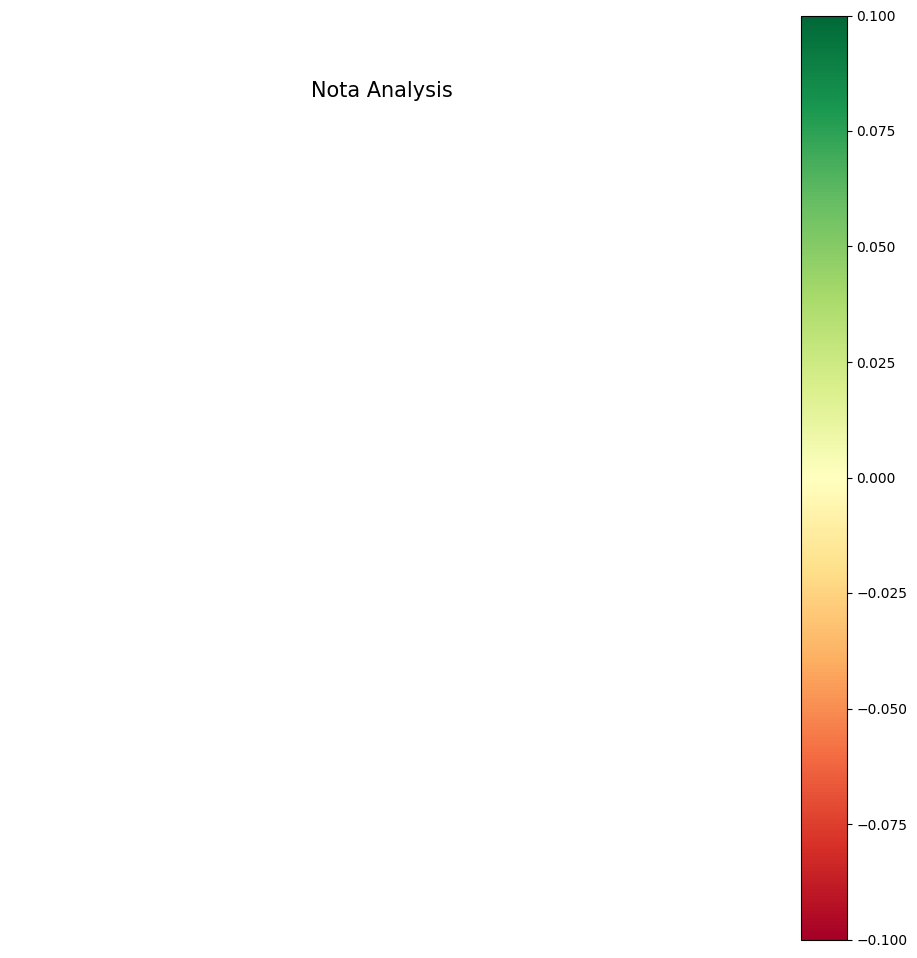

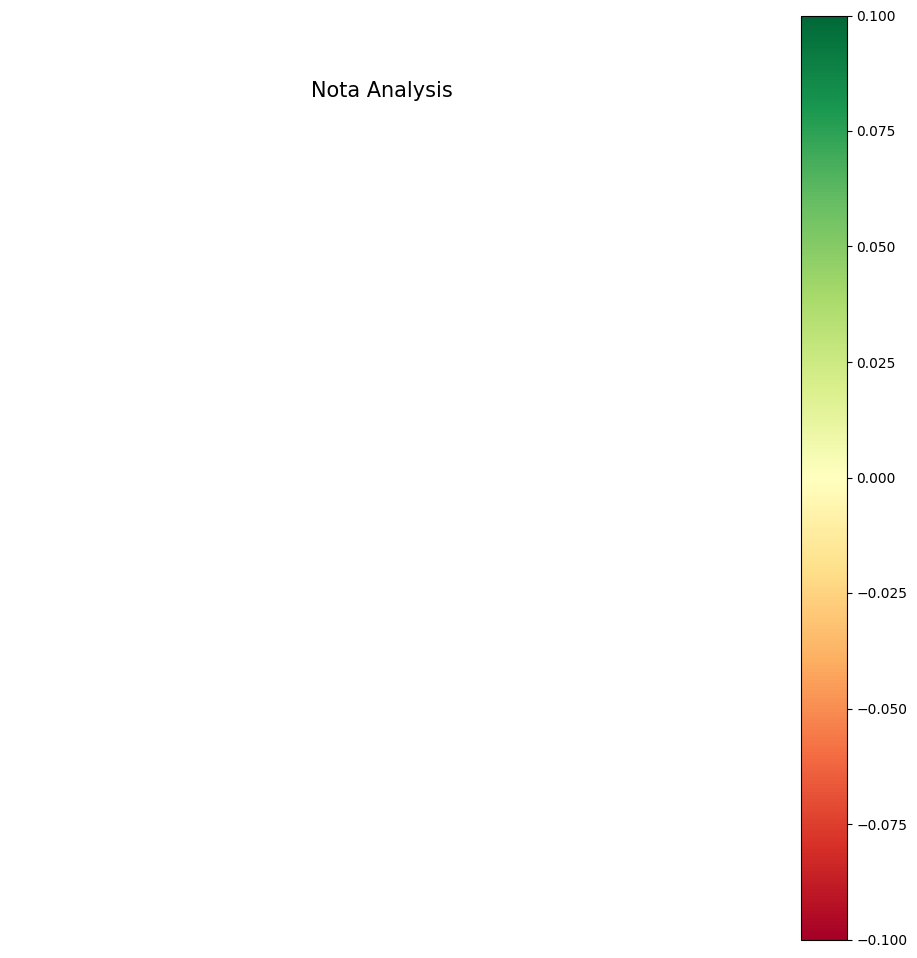

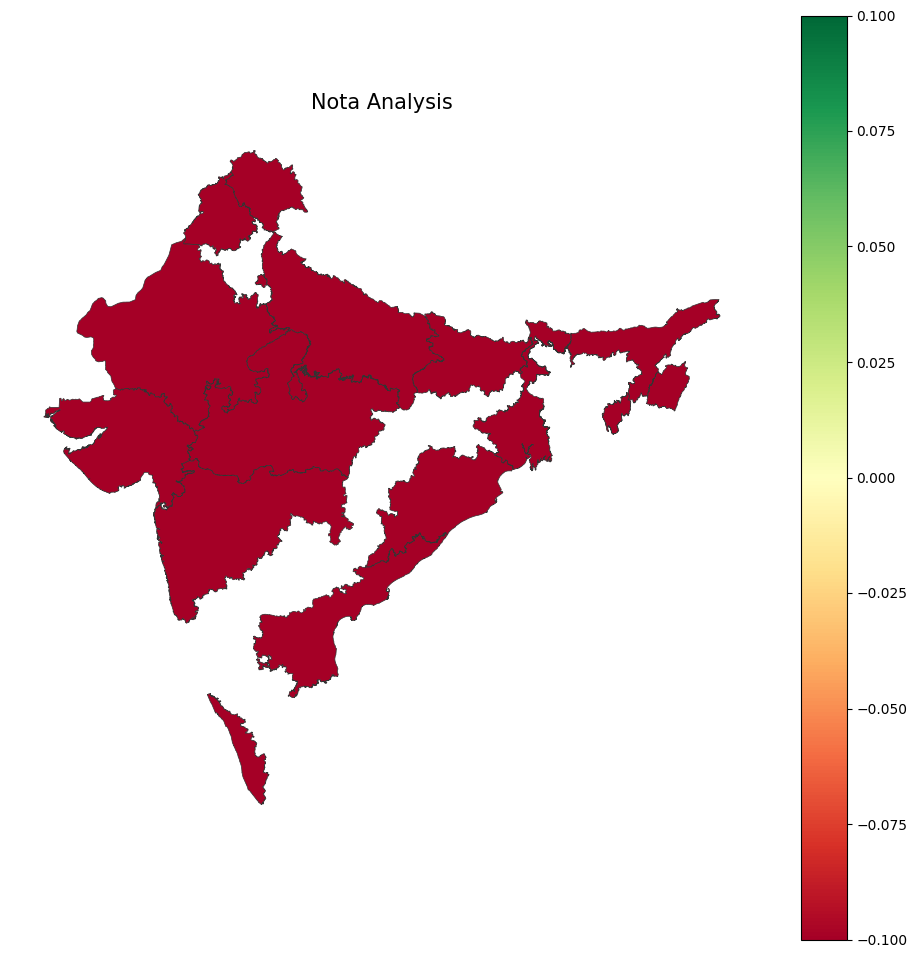

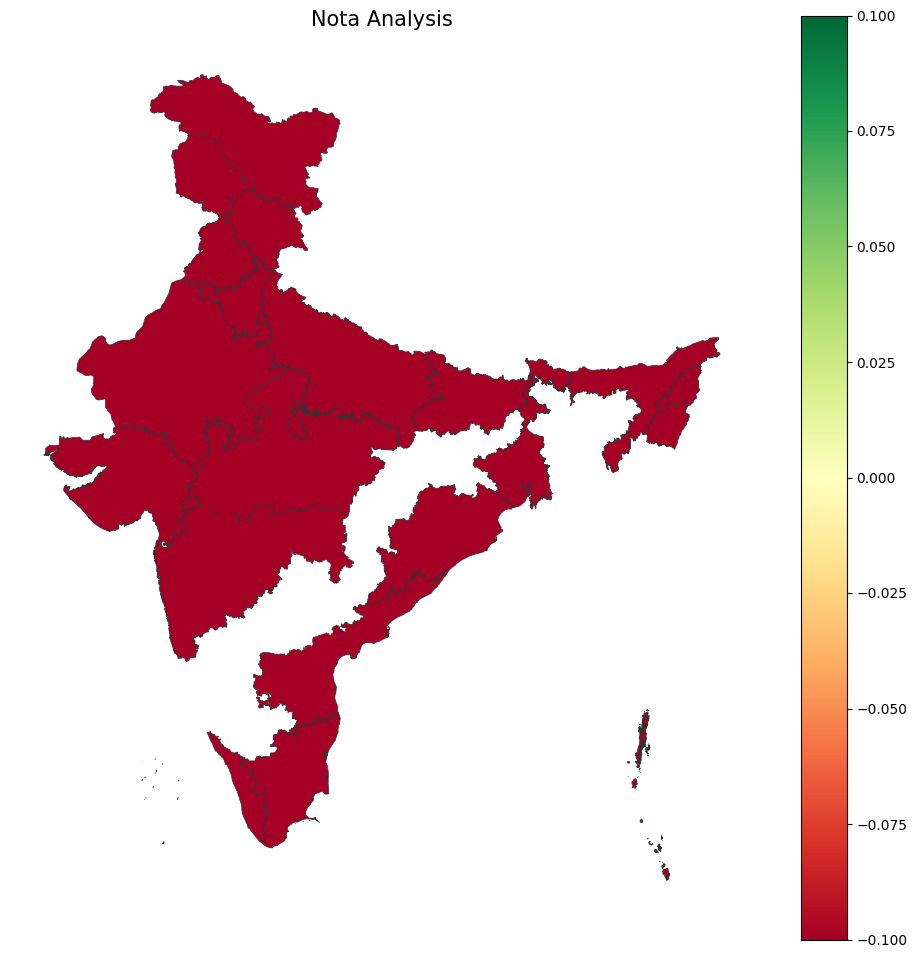

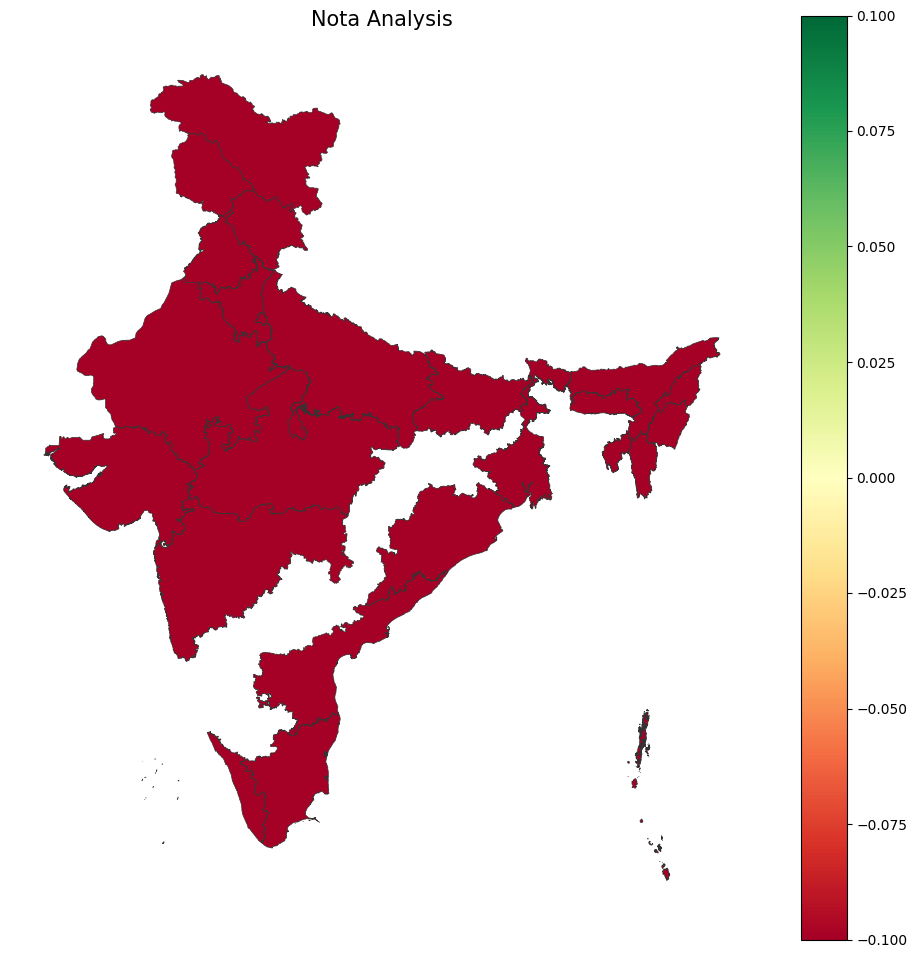

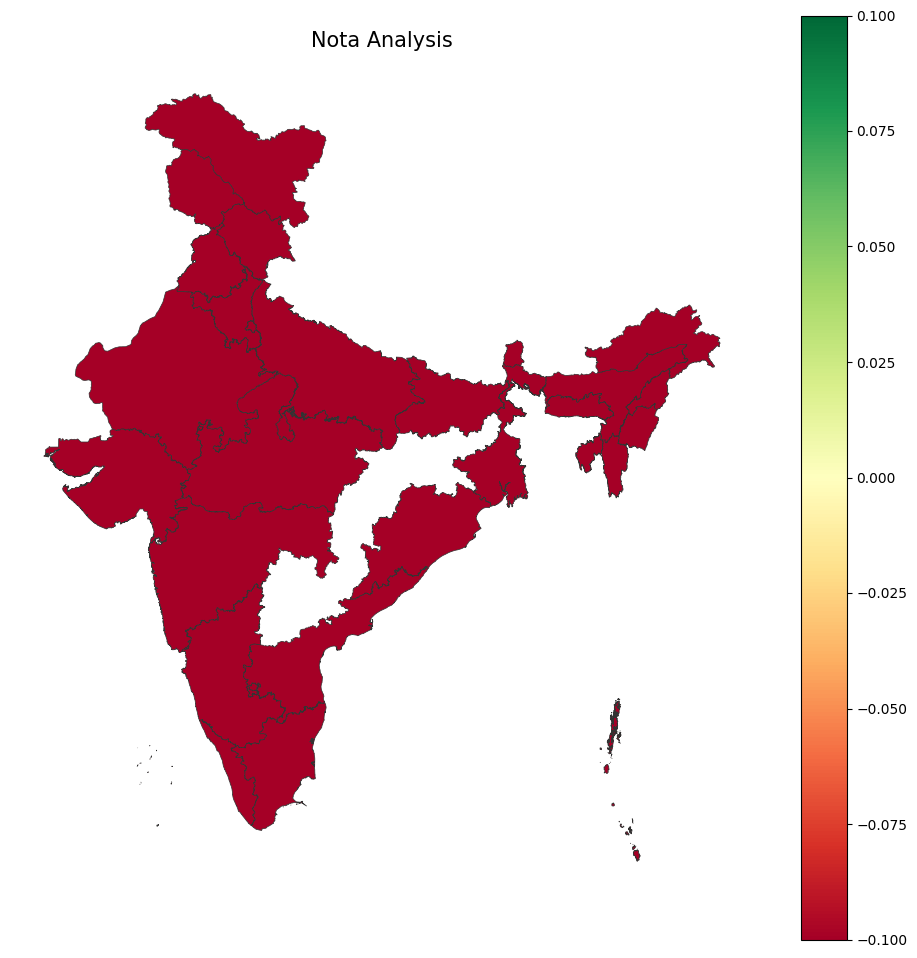

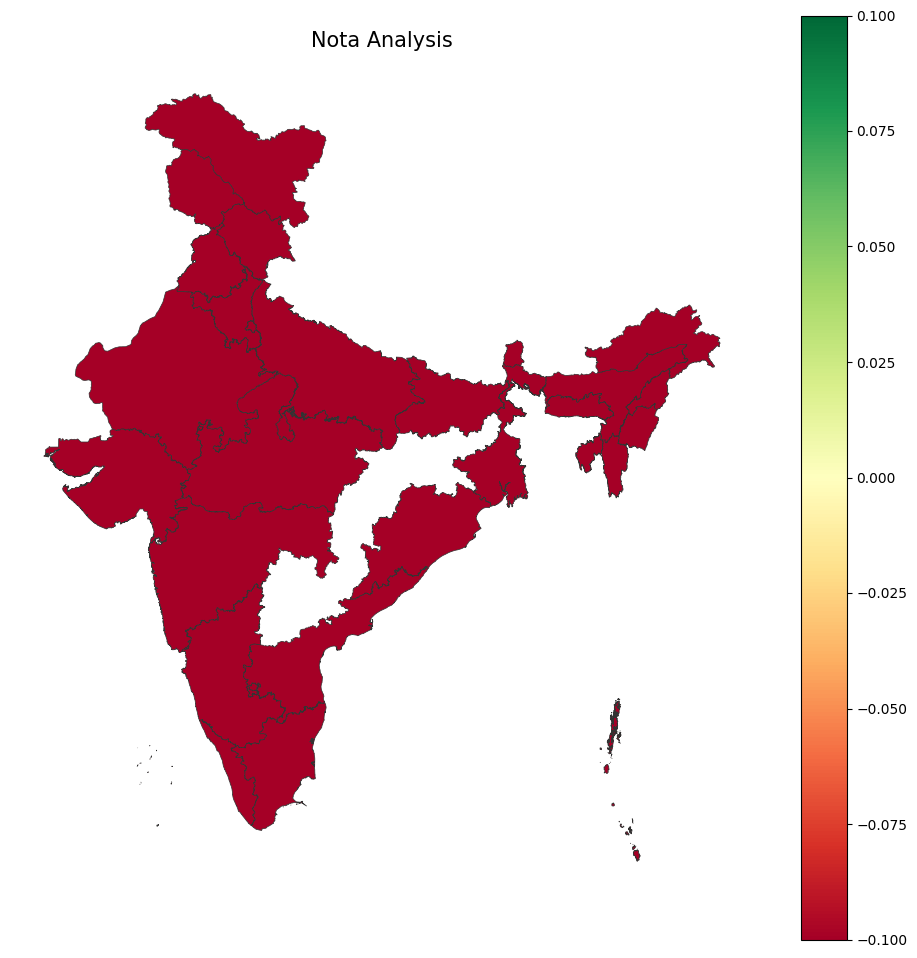

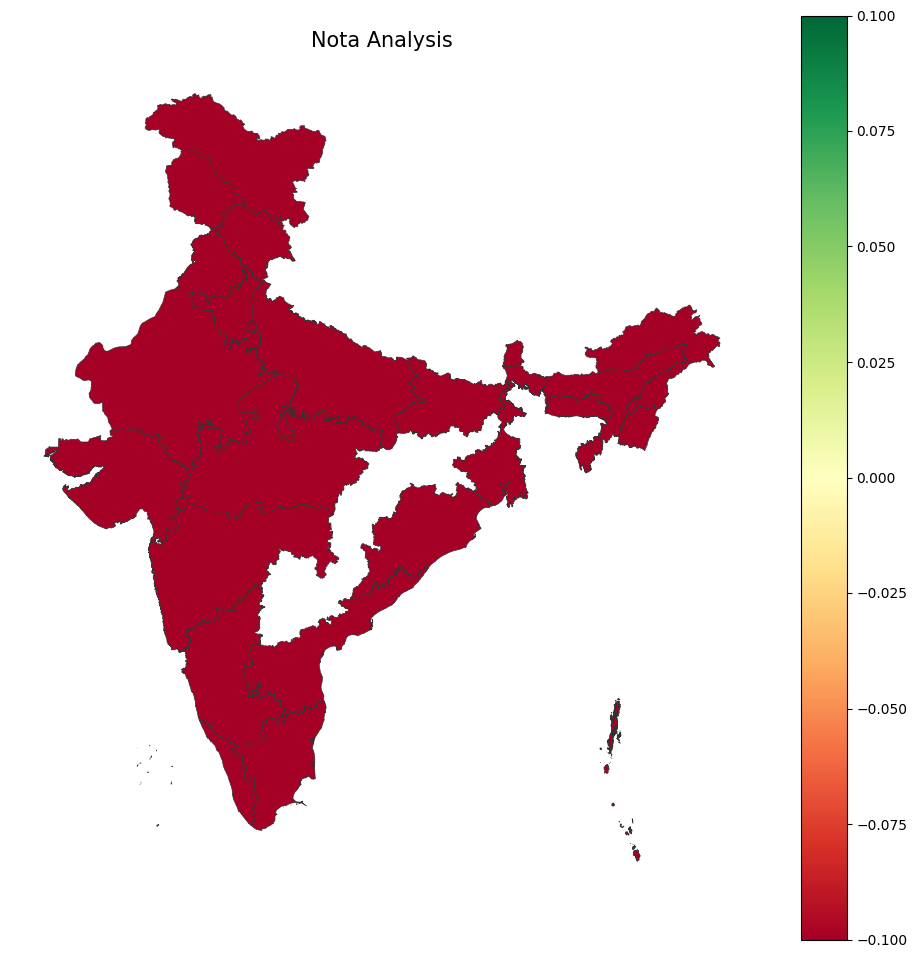

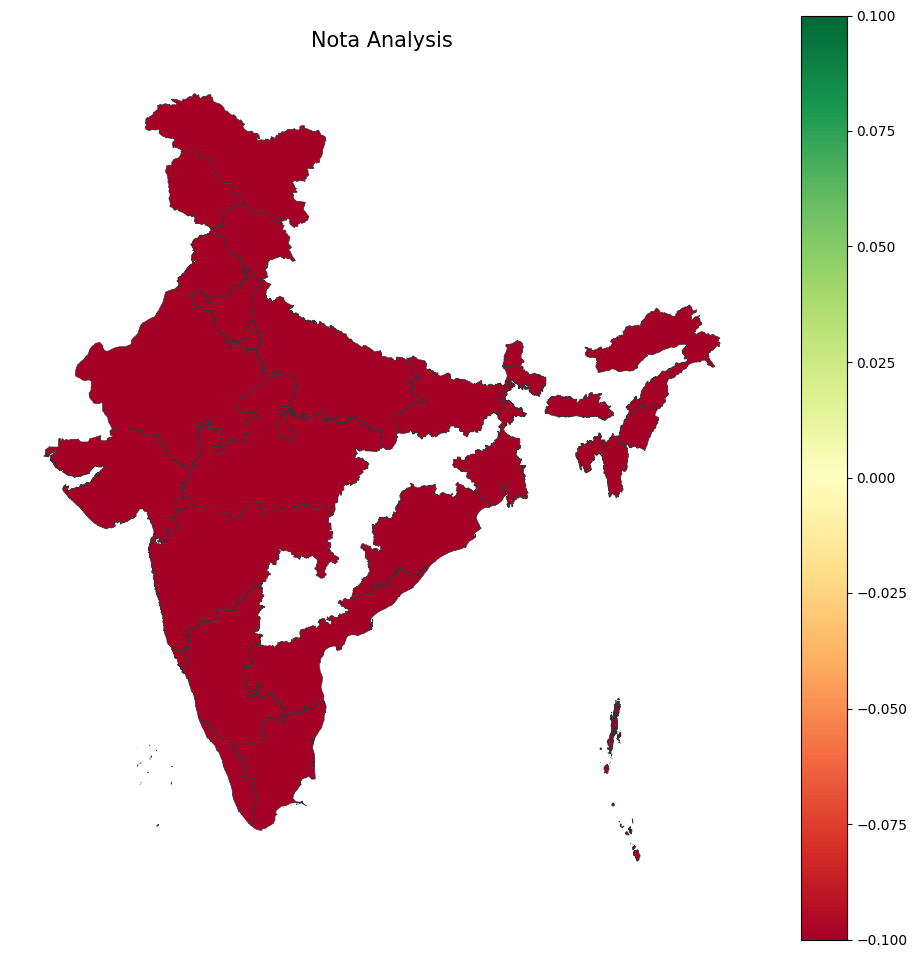

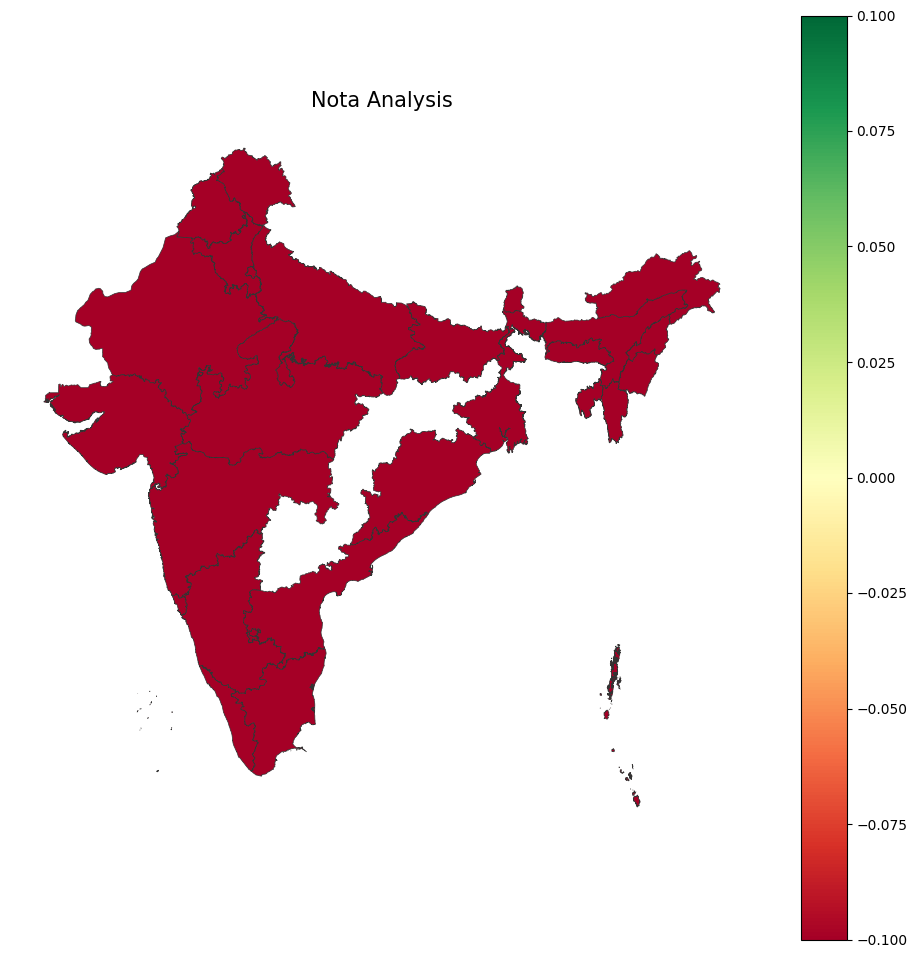

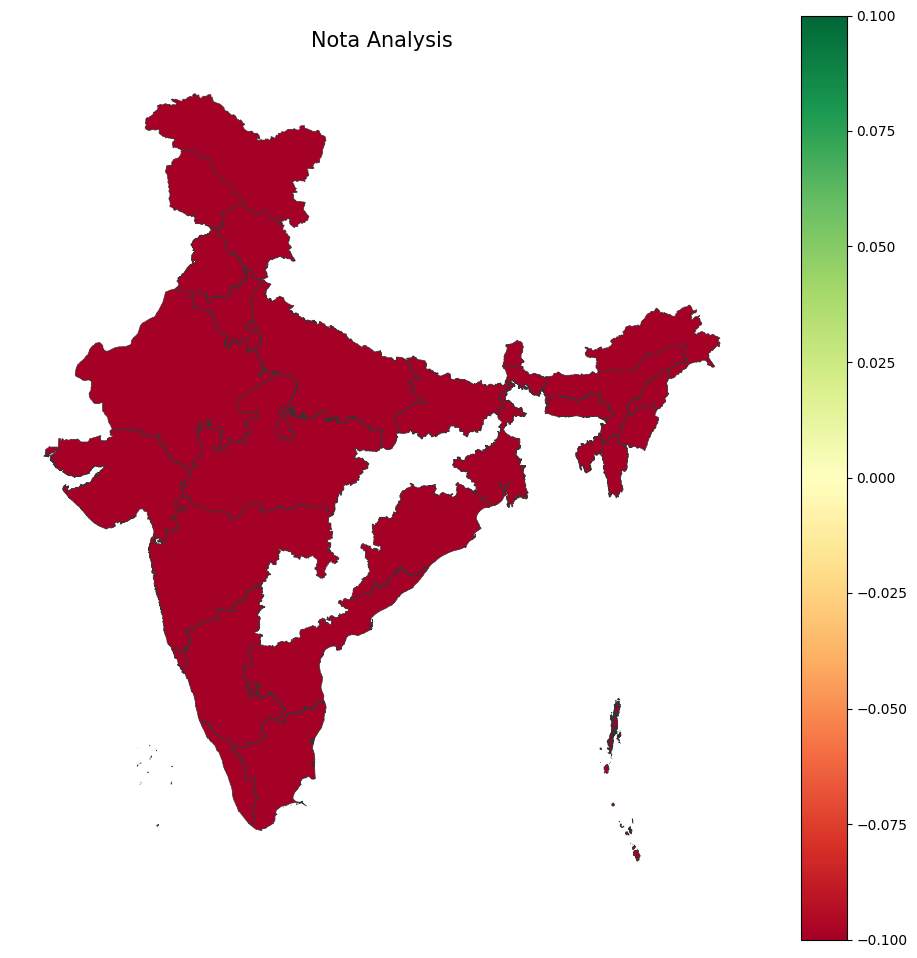

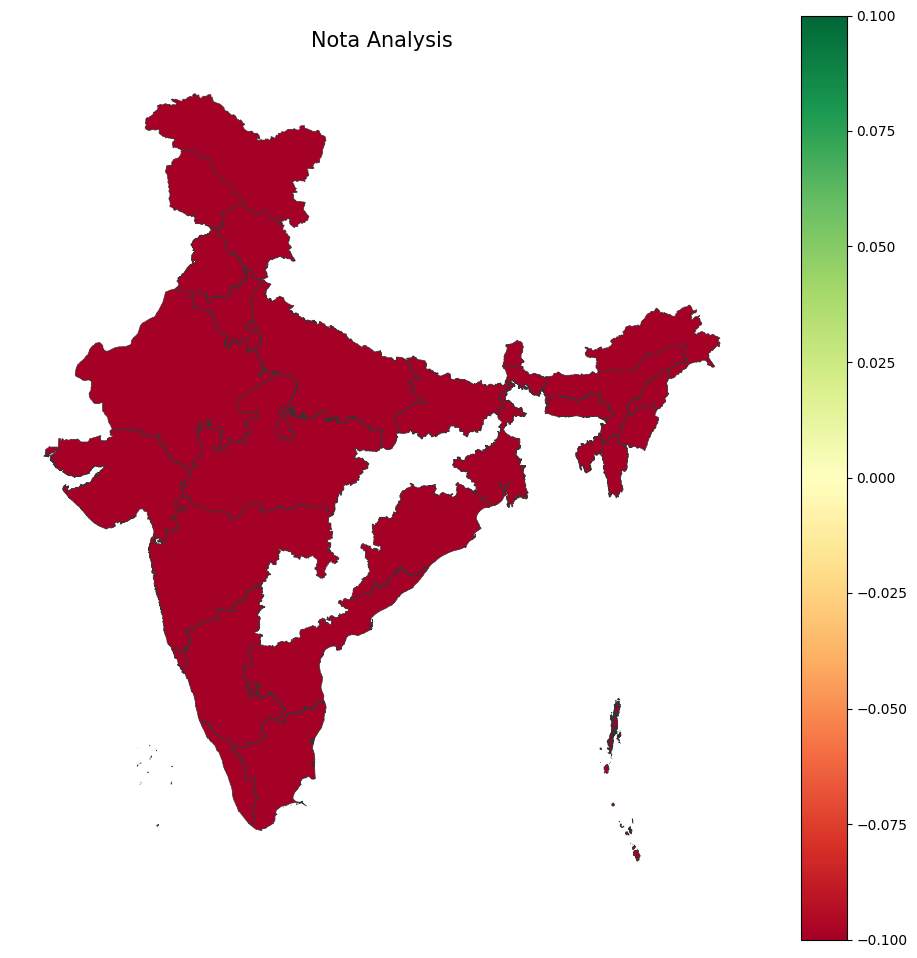

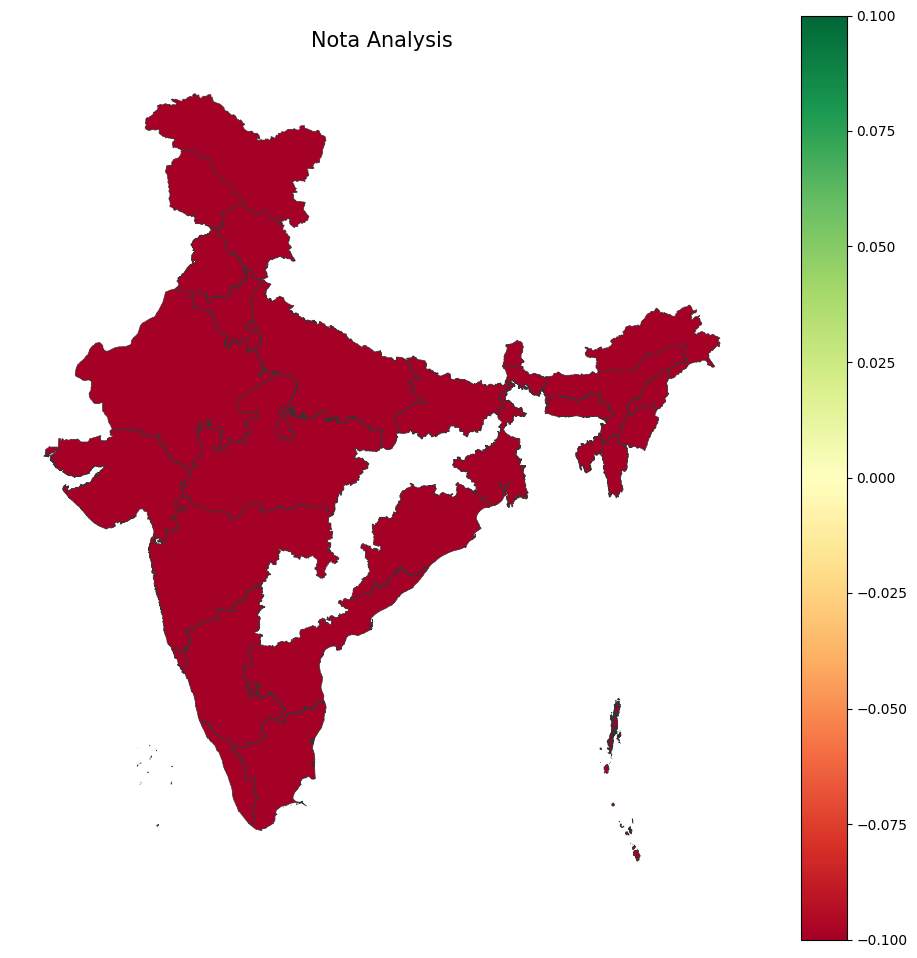

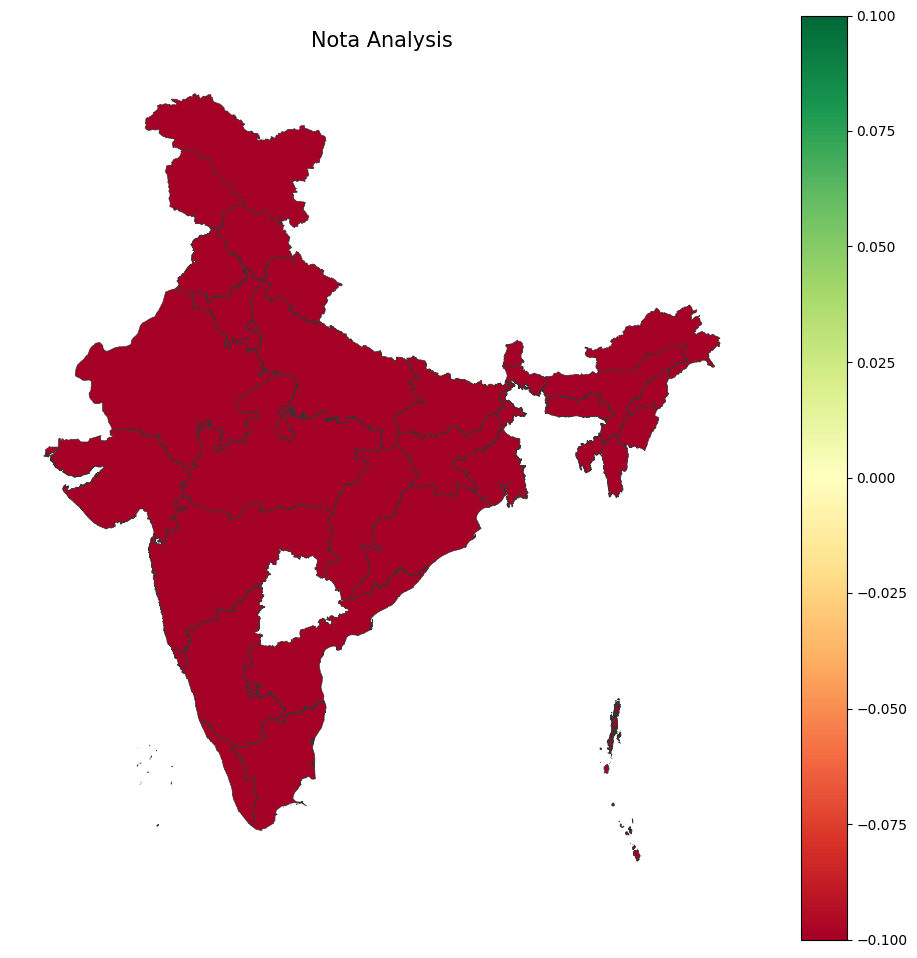

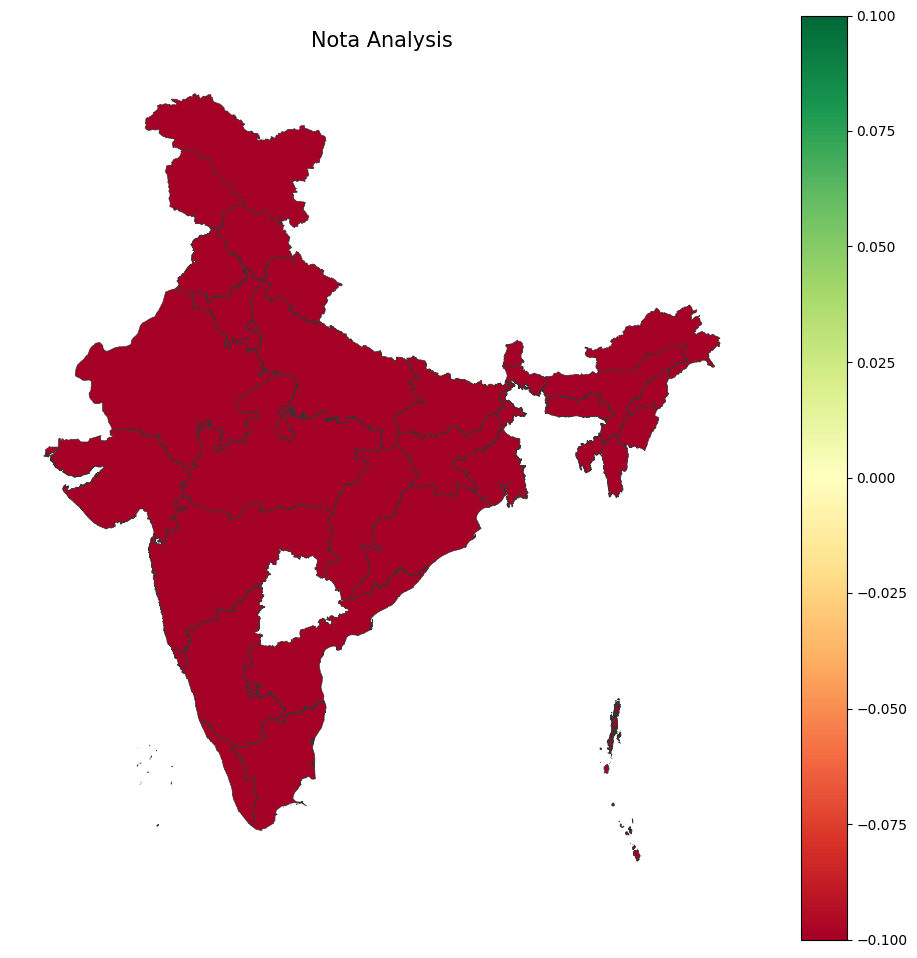

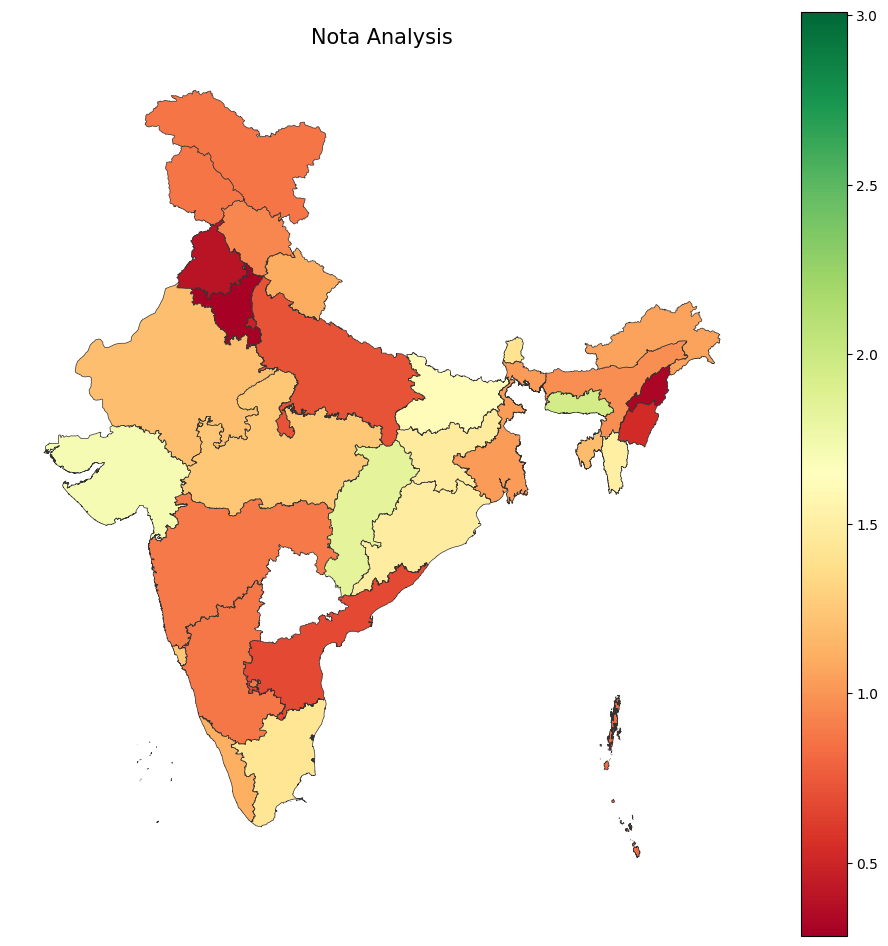

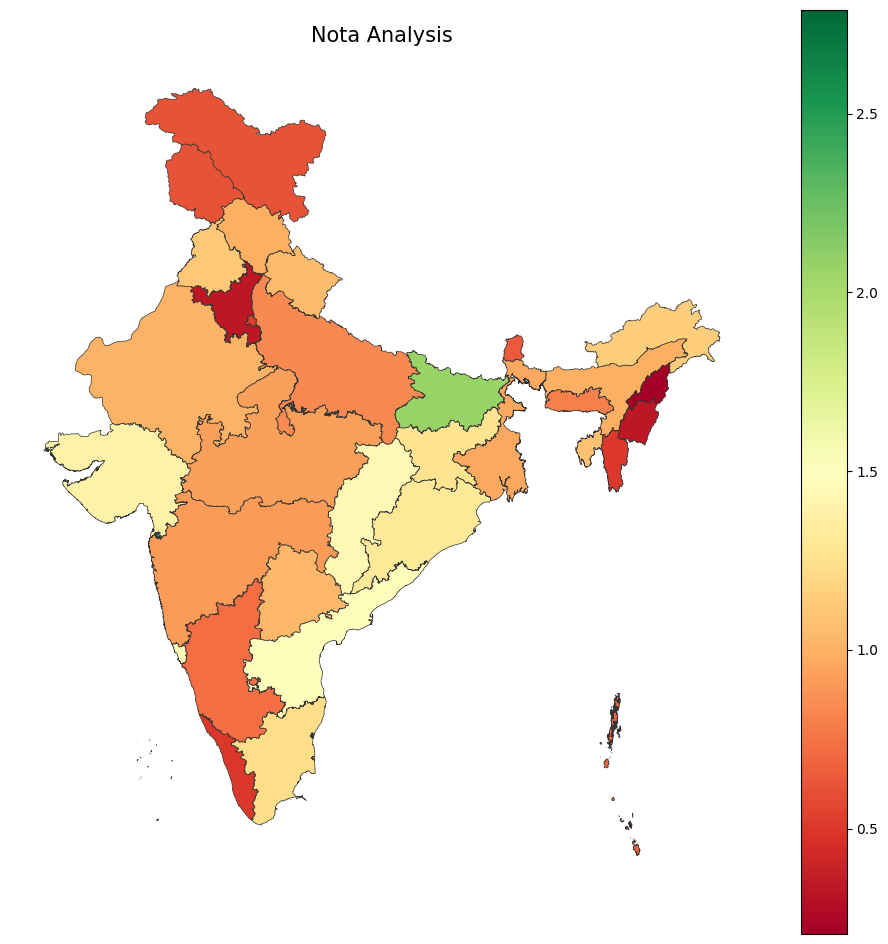

In [15]:
COL_NAME = "Nota Analysis"
geoPandasOutput = outputDir + "geoPandasOutput/"

if not os.path.exists(geoPandasOutput):
        os.makedirs(geoPandasOutput)


for elNum in range(1, 18):
    shpdf = gpd.read_file('./shapefile/India_State_Boundary.shp')
    # add empty column
    shpdf[COL_NAME] = np.nan
    # change statename
    for i in range(len(shpdf)):
        stateName = map1_to_2[shpdf.loc[i, 'State_Name']] if shpdf.loc[i, 'State_Name'] in map1_to_2 else shpdf.loc[i, 'State_Name']
        if stateName in stateAvgDict and elNum in stateAvgDict[stateName]:
            shpdf.loc[i, COL_NAME] = stateAvgDict[stateName][elNum]

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title(COL_NAME,
                fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = shpdf.plot(column=COL_NAME, cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
    # save
    fig.get_figure().savefig(geoPandasOutput + str(elNum) + ".png", dpi=300)